1. Import data and packages

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
stim = np.genfromtxt('MDA1_data/stim.txt')
spikes = np.genfromtxt('MDA1_data/spikes.txt')

In [7]:
spikes.shape

(25, 42600)

In [11]:
spikes[0][:60]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.])

2. Reshape response data into response matrix

In [111]:
cell = 0
tau = 60
R = np.empty([len(stim)-2*tau, 2*tau+1])
for t in range(len(stim)-2*tau):
    R[t][0] = 1
    R[t][1:2*tau+1] = spikes[cell][t:t+2*tau]    

In [112]:
R

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

3. Find f

In [113]:
f = np.dot(np.linalg.inv(np.dot(np.transpose(R),R)),np.dot(np.transpose(R),stim[tau:len(stim)-tau]))

In [114]:
f

array([-1.57442663,  0.08453838,  0.08100857,  0.07605476,  0.07328242,
        0.07660546,  0.08496857,  0.08897666,  0.09735195,  0.10092208,
        0.10529316,  0.10880285,  0.11129024,  0.1153502 ,  0.12402406,
        0.13245951,  0.13644807,  0.14059063,  0.14876375,  0.15801843,
        0.16343376,  0.16380244,  0.16700615,  0.17411668,  0.18649916,
        0.19227339,  0.19169597,  0.19555729,  0.1990141 ,  0.20107515,
        0.2029968 ,  0.20714505,  0.2104909 ,  0.21704532,  0.22383412,
        0.22983543,  0.23585491,  0.23660259,  0.23577797,  0.23880539,
        0.24318077,  0.24800639,  0.25026876,  0.24864249,  0.24696718,
        0.24578136,  0.24876208,  0.25670654,  0.25888069,  0.26124007,
        0.26895426,  0.27670697,  0.2853632 ,  0.29778528,  0.30837347,
        0.31616349,  0.31763465,  0.31551669,  0.3234818 ,  0.33307541,
        0.33627236,  0.33715818,  0.33938606,  0.33679034,  0.33853158,
        0.34323915,  0.34361884,  0.34284625,  0.33929921,  0.33

In [115]:
st_est = np.dot(R,f)
print(len(st_est))

42480


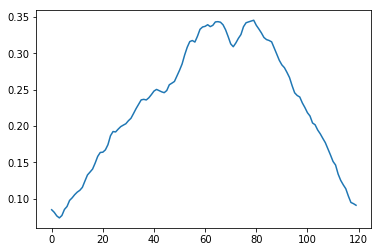

In [117]:
plt.plot(f[-120:])

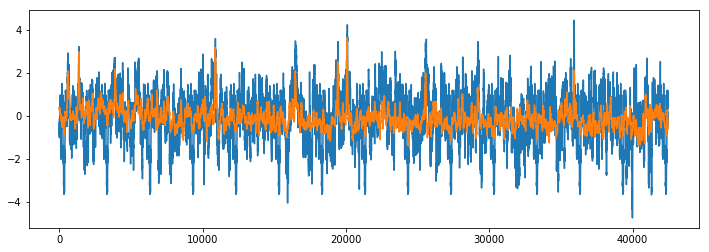

In [118]:
plt.figure(figsize = (12,4))
plt.plot(stim[tau:len(stim)-tau])
plt.plot(st_est)

In [119]:
r, p = stats.pearsonr(stim[tau:len(stim)-tau], st_est)
print(r, p)

0.42405225423610043 0.0


### For many cells!!!

In [130]:
tau = 60
R_all = np.empty([25, len(stim)-2*tau, 2*tau+1])
for cell in range(25):
    for t in range(len(stim)-2*tau):
        R_all[cell][t][0] = 1
        R_all[cell][t][1:2*tau+1] = spikes[cell][t:t+2*tau] 

In [131]:
R

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [132]:
f_all = np.empty([25,2*tau+1])
estimates = np.empty([25, len(stim)-2*tau])
all_r = np.empty([25,1])
for cell in range(25):
    f_all[cell] = np.dot(np.linalg.inv(np.dot(np.transpose(R_all[cell]),R_all[cell])),
                    np.dot(np.transpose(R_all[cell]),stim[tau:len(stim)-tau]))
    estimates[cell] = np.dot(R_all[cell],f_all[cell])
    all_r[cell], _ = stats.pearsonr(stim[tau:len(stim)-tau], estimates[cell])
f_mean = np.mean(f_all, axis = 0)
f_std = np.std(f_all, axis = 0)

Text(0.5, 1.0, 'STD between filters for different cells')

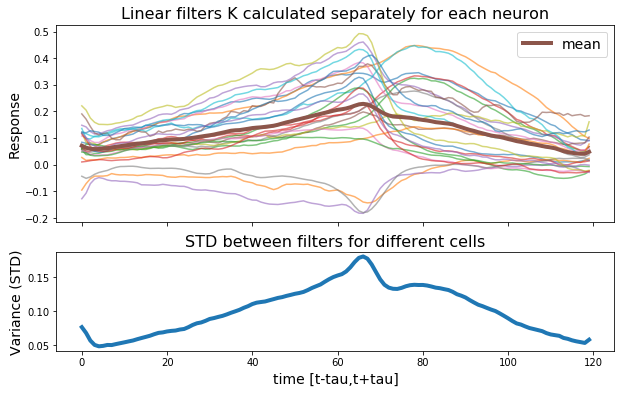

In [134]:
fig, ax = plt.subplots(2, 1, figsize = (10,6), sharex = True, gridspec_kw={'height_ratios': [2,1]})
for cell in range(25):
    ax[0].plot(f_all[cell][-2*tau:], alpha = 0.6)
ax[0].plot(f_mean[-2*tau:], label = 'mean', linewidth = 4)
ax[0].set_ylabel('Response', fontsize = 14)
ax[0].legend(fontsize = 14)
ax[1].set_ylabel('Variance (STD)', fontsize = 14)
ax[1].plot(f_std[-2*tau:], label = 'mean', linewidth = 4)
ax[1].set_xlabel('time [t-tau,t+tau]', fontsize = 14)
ax[0].set_title('Linear filters K calculated separately for each neuron', fontsize = 16)
ax[1].set_title('STD between filters for different cells', fontsize = 16)

In [107]:
print(all_r.mean(), all_r.std())

0.4602805190941389 0.13956334612918317
